# Análisis de series temporales

1. Introducción 
2. Métodos clásicos: 
    1. smoothing ETS
    2. ARIMA
    3. VARMA
3. Métodos con Machine learning
4. Métodos con Deeap learning

Curso: https://deeplearningcourses.com/c/time-series-analysis

In [82]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

### Ejercicio 1: Muestra aleatoria, con tendencia gaussiana (RUIDO) 

1. Histograma
2. Serie temporal

Estadistica: media 101.40636929974342 varianza 2440.5913605618794 asimetría -0.06730286014712401 curtosis 0.31971387941151974


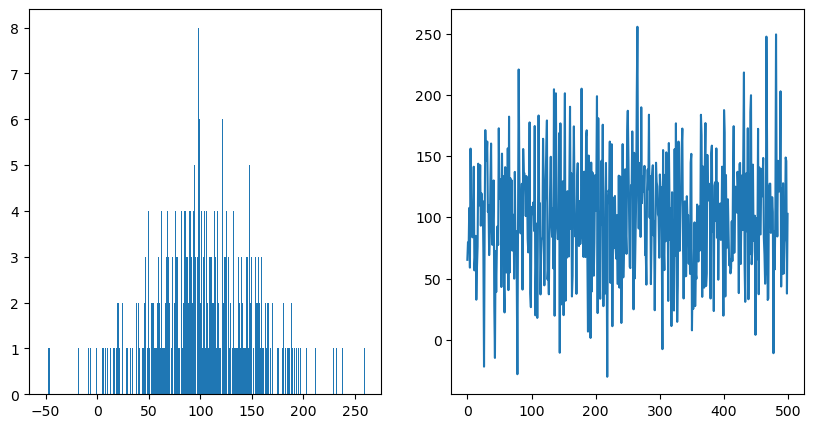

In [83]:
 # list  
nums = []  
mu = 100
sigma = 50
n = 500
gauss = np.random.normal(mu, sigma, n)
   
for i in range(n):  
    temp = np.random.normal(mu, sigma) 
    nums.append(temp)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(gauss, n) 

plt.subplot(1,2,2)
plt.plot(nums)  
print("Estadistica:", "media", np.mean(gauss), "varianza", np.var(gauss) , "asimetría", st.skew(gauss),"curtosis", st.kurtosis(gauss)) 

### Ejercicio 2: Muestra aleatoria, con tendencia lineal (SEÑAL) 

1. Histograma
2. Ajustar una función

m = [1.91835218], b = 13.58792525736692
Error Cuadrático Medio (MSE) = 331.8522012927901 , Raíz del Error Cuadrático Medio (RMSE) = 18.216810952875097
Coeficiente de Determinación R2 = 0.9736439121020338


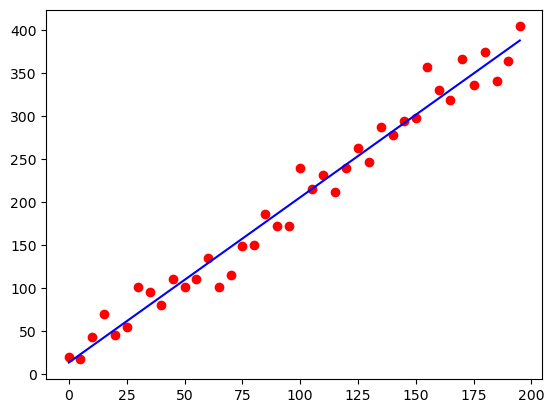

In [84]:
def f(x):  # función f(x) = 2*x + 10 + 20*ruido
    np.random.seed(42)
    y = 2*x + 10 + 20*np.random.randn(x.shape[0])
    return y
x = np.arange(0, 200, 5) 
y = f(x) 

regresion_lineal = LinearRegression() 
regresion_lineal.fit(x.reshape(-1,1), y) 
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
plt.scatter(x, y, color="red")
plt.plot(x, prediccion_entrenamiento, color="blue")

# Error Cuadrado Medio
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(x.reshape(-1,1), y)
print('m = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_)) 
print('Error Cuadrático Medio (MSE) = ' + str(mse) + ' , Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
print('Coeficiente de Determinación R2 = ' + str(r2))


### Función de distribución acumulada (CDF) 

Calcula la probabilidad acumulada de un valor dado de x, es decir,  para determinar la probabilidad de que una observación aleatoria que se toma de la población sea encuentre entre cierto valor.

<div> <img src="fig/cdf.jpg" alt="Drawing" style="width: 500px;"/></div>


https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html

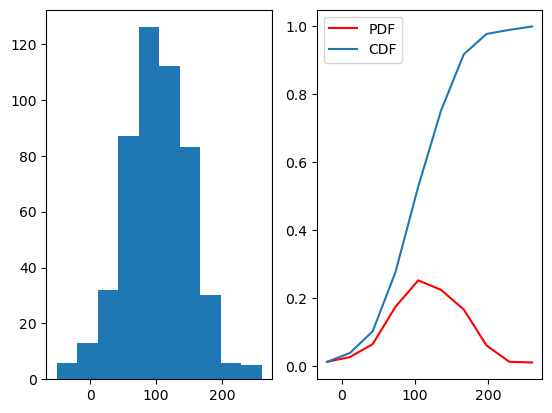

In [88]:

count, bins_count = np.histogram(gauss, bins=10) 
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 
  
plt.subplot(1,2,1)
plt.hist(gauss, 10)
plt.subplot(1,2,2)

plt.plot(bins_count[1:], pdf, color="red", label="PDF") 
plt.plot(bins_count[1:], cdf, label="CDF") 
plt.legend() 



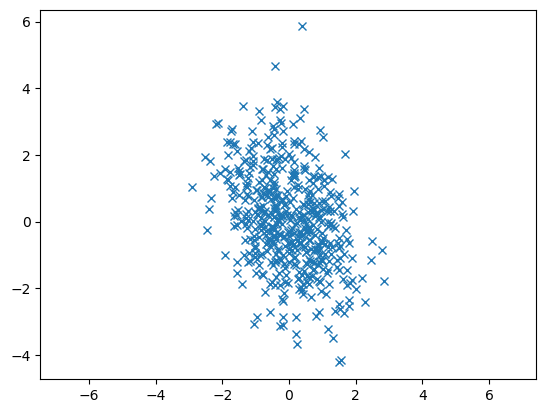

(-0.01778636589928535,
 0.05995637591501887,
 0.9894145119104804,
 2.1450535865820286,
 -0.0022481795973334903,
 0.16740338957028814,
 -0.30216537314364533,
 0.27451504615882705)

In [103]:
mean = [0, 0]
cov = [[1, -0.5], [-0.5, 2]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, n).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()
np.mean(x), np.mean(y), np.var(x), np.var(y), st.skew(x), st.skew(y), st.kurtosis(x), st.kurtosis(y)
